# Import Dataset

In [1]:
import pandas as pd
# Calculate feature
po_feature = pd.read_csv (r'tpc_train_po_cdhi_pos.csv')
ne_feature = pd.read_csv (r'tpc_train_ne_cdhi_neg.csv')
# Create class labels
po_class = pd.Series(['positive' for i in range(len(po_feature))])
ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
# Combine po and ne
po_ne_class = pd.concat([po_class, ne_class], axis=0)
po_ne_class.name = 'class'
po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
# Combine feature and class
df_tpc = pd.concat([po_ne_feature, po_ne_class], axis=1)
print(df_tpc)



      TPC_AAA  TPC_AAC  TPC_AAD  TPC_AAE  TPC_AAF  TPC_AAG  TPC_AAH  TPC_AAI  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1882      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1883      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1884      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1885      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1886      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      TPC_AAK  TPC_AAL  ...  TPC_YYN  T

In [2]:
df_tpc

TPC_AAA  TPC_AAC  TPC_AAD  TPC_AAE  TPC_AAF  TPC_AAG  TPC_AAH  TPC_AAI  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1882      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1883      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1884      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1885      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1886      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      TPC_AAK  TPC_AAL  ...  TPC_YYN  TPC_YYP  TPC_YYQ  TPC_YYR  TPC_YYS  \
0         0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
2         0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
...       ...      ...  ...      ...      ...      ...      ...      ...   
1882      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1883      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1884      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1885      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1886      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   

      TPC_YYT  TPC_YYV  TPC_YYW  TPC_YYY     class  
0         0.0      0.0      0.0      0.0  positive  
1         0.0      0.0      0.0      0.0  positive  
2         0.0      0.0      0.0      0.0  positive  
3         0.0      0.0      0.0      0.0  positive  
4         0.0      0.0      0.0      0.0  positive  
...       ...      ...      ...      ...       ...  
1882      0.0      0.0      0.0      0.0  negative  
1883      0.0      0.0      0.0      0.0  negative  
1884      0.0      0.0      0.0      0.0  negative  
1885      0.0      0.0      0.0      0.0  negative  
1886      0.0      0.0      0.0      0.0  negative  

[3145 rows x 8001 columns]

In [3]:
# Assigns the features to X and class label to Y
X = df_tpc.drop('class', axis=1)
y = df_tpc['class'].copy()

In [4]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [5]:
X.shape

(3145, 8000)

In [6]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

TPC_AAA  TPC_AAD  TPC_AAE  TPC_AAF  TPC_AAG  TPC_AAH  TPC_AAI  TPC_AAK  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1882      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1883      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1884      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1885      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1886      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      TPC_AAL  TPC_AAM  ...  TPC_YYA  TPC_YYE  TPC_YYF  TPC_YYG  TPC_YYI  \
0         0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
2         0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
...       ...      ...  ...      ...      ...      ...      ...      ...   
1882      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1883      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1884      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1885      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1886      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   

      TPC_YYL  TPC_YYR  TPC_YYS  TPC_YYT  TPC_YYY  
0         0.0      0.0      0.0      0.0      0.0  
1         0.0      0.0      0.0      0.0      0.0  
2         0.0      0.0      0.0      0.0      0.0  
3         0.0      0.0      0.0      0.0      0.0  
4         0.0      0.0      0.0      0.0      0.0  
...       ...      ...      ...      ...      ...  
1882      0.0      0.0      0.0      0.0      0.0  
1883      0.0      0.0      0.0      0.0      0.0  
1884      0.0      0.0      0.0      0.0      0.0  
1885      0.0      0.0      0.0      0.0      0.0  
1886      0.0      0.0      0.0      0.0      0.0  

[3145 rows x 2792 columns]

In [7]:
# Data split in case independent dataset isn't available
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

In [ ]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = df_tpc.drop('class', axis=1)
y = df_tpc['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
#models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

/home/lazyrook/anaconda3/envs/lazypredict/lib/python3.9/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 38%|███▊      | 11/29 [04:54<14:56, 49.79s/it]

In [9]:
# Prints the model performance (Train set)
models_train

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
DecisionTreeClassifier             1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
ExtraTreeClassifier                1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
LabelPropagation                   1.00               1.00    None      1.00   
LabelSpreading                     1.00               1.00    None      1.00   
NuSVC                              1.00               1.00    None      1.00   
QuadraticDiscriminantAnalysis      0.99               0.99    None      0.99   
BaggingClassifier                  0.99               0.98    None      0.99   
LGBMClassifier                     0.94               0.94    None      0.94   
XGBClassifier                      0.94               0.93    None      0.94   
SVC                                0.92               0.91    None      0.92   
KNeighborsClassifier               0.78               0.78    None      0.78   
LinearDiscriminantAnalysis         0.75               0.72    None      0.74   
CategoricalNB                      0.73               0.71    None      0.72   
AdaBoostClassifier                 0.71               0.71    None      0.71   
LogisticRegression                 0.73               0.70    None      0.72   
RidgeClassifierCV                  0.73               0.70    None      0.72   
RidgeClassifier                    0.73               0.70    None      0.72   
LinearSVC                          0.71               0.68    None      0.70   
BernoulliNB                        0.71               0.68    None      0.70   
NearestCentroid                    0.68               0.68    None      0.68   
GaussianNB                         0.68               0.67    None      0.68   
SGDClassifier                      0.66               0.64    None      0.65   
PassiveAggressiveClassifier        0.65               0.64    None      0.65   
Perceptron                         0.64               0.62    None      0.64   
CalibratedClassifierCV             0.64               0.56    None      0.55   
DummyClassifier                    0.51               0.49    None      0.51   

                               matthews_corrcoef  Time Taken  
Model                                                         
DecisionTreeClassifier                      1.00        0.30  
RandomForestClassifier                      1.00        1.28  
ExtraTreeClassifier                         1.00        0.12  
ExtraTreesClassifier                        1.00        1.54  
LabelPropagation                            1.00        0.50  
LabelSpreading                              1.00        0.53  
NuSVC                                       1.00        9.58  
QuadraticDiscriminantAnalysis               0.98        0.28  
BaggingClassifier                           0.97        1.50  
LGBMClassifier                              0.88        0.66  
XGBClassifier                               0.87        2.08  
SVC                                         0.84        9.22  
KNeighborsClassifier                        0.55        6.69  
LinearDiscriminantAnalysis                  0.46        0.32  
CategoricalNB                               0.42        0.21  
AdaBoostClassifier                          0.41        0.88  
LogisticRegression                          0.42        0.17  
RidgeClassifierCV                           0.42        0.30  
RidgeClassifier                             0.42        0.15  
LinearSVC                                   0.38        3.67  
BernoulliNB                                 0.37        0.15  
NearestCentroid                             0.35        0.11  
GaussianNB                                  0.34        0.13  
SGDClassifier                               0.28       

In [10]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = df_tpc.drop('class', axis=1)
y = df_tpc['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
#models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:42<00:00,  1.47s/it]


In [11]:
# Prints the model performance (Test set)
models_test

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.71               0.66    None      0.69   
ExtraTreesClassifier               0.70               0.66    None      0.68   
XGBClassifier                      0.69               0.65    None      0.68   
LGBMClassifier                     0.67               0.64    None      0.66   
BaggingClassifier                  0.67               0.63    None      0.65   
NuSVC                              0.66               0.62    None      0.64   
KNeighborsClassifier               0.60               0.61    None      0.61   
AdaBoostClassifier                 0.62               0.61    None      0.62   
DecisionTreeClassifier             0.63               0.61    None      0.63   
QuadraticDiscriminantAnalysis      0.65               0.59    None      0.61   
SVC                                0.63               0.57    None      0.59   
ExtraTreeClassifier                0.58               0.57    None      0.58   
LinearDiscriminantAnalysis         0.60               0.57    None      0.59   
RidgeClassifier                    0.59               0.55    None      0.58   
NearestCentroid                    0.56               0.55    None      0.57   
PassiveAggressiveClassifier        0.58               0.55    None      0.57   
RidgeClassifierCV                  0.59               0.55    None      0.58   
BernoulliNB                        0.59               0.55    None      0.57   
LinearSVC                          0.58               0.55    None      0.57   
GaussianNB                         0.56               0.55    None      0.56   
LogisticRegression                 0.58               0.55    None      0.57   
Perceptron                         0.54               0.52    None      0.54   
SGDClassifier                      0.55               0.52    None      0.54   
CalibratedClassifierCV             0.60               0.51    None      0.50   
DummyClassifier                    0.52               0.50    None      0.52   
LabelSpreading                     0.60               0.50    None      0.45   
LabelPropagation                   0.60               0.50    None      0.45   

                               matthews_corrcoef  Time Taken  
Model                                                         
RandomForestClassifier                      0.37        1.18  
ExtraTreesClassifier                        0.36        1.44  
XGBClassifier                               0.33        2.04  
LGBMClassifier                              0.29        0.60  
BaggingClassifier                           0.29        1.48  
NuSVC                                       0.26        6.14  
KNeighborsClassifier                        0.22        1.79  
AdaBoostClassifier                          0.23        0.75  
DecisionTreeClassifier                      0.22        0.26  
QuadraticDiscriminantAnalysis               0.23        0.22  
SVC                                         0.17        5.80  
ExtraTreeClassifier                         0.14        0.08  
LinearDiscriminantAnalysis                  0.14        0.27  
RidgeClassifier                             0.11        0.09  
NearestCentroid                             0.11        0.07  
PassiveAggressiveClassifier                 0.11        0.17  
RidgeClassifierCV                           0.11        0.20  
BernoulliNB                                 0.11        0.08  
LinearSVC                                   0.10        3.67  
GaussianNB                                  0.09        0.08  
LogisticRegression                          0.10        0.13  
Perceptron                                  0.05        0.09  
SGDClassifier                               0.04        0.65  
CalibratedClassifierCV                      0.05       14.40  
DummyClassifier                             0.01        0.06  
LabelSpre

In [12]:
y_test

681     positive
1839    negative
1869    negative
1584    negative
1136    negative
          ...   
975     negative
387     negative
641     negative
531     positive
201     negative
Name: class, Length: 629, dtype: object

[(0.0, 1.0)]

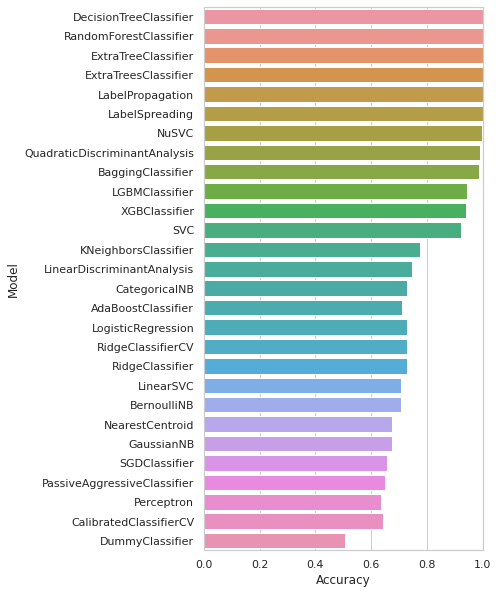

In [13]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

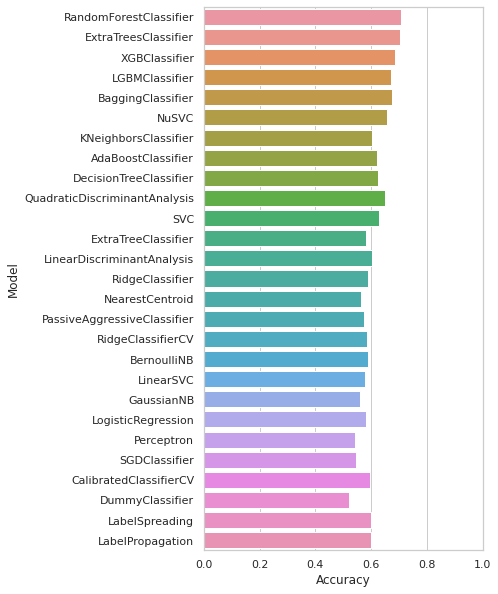

In [14]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_test.index, x="Accuracy", data=models_test)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

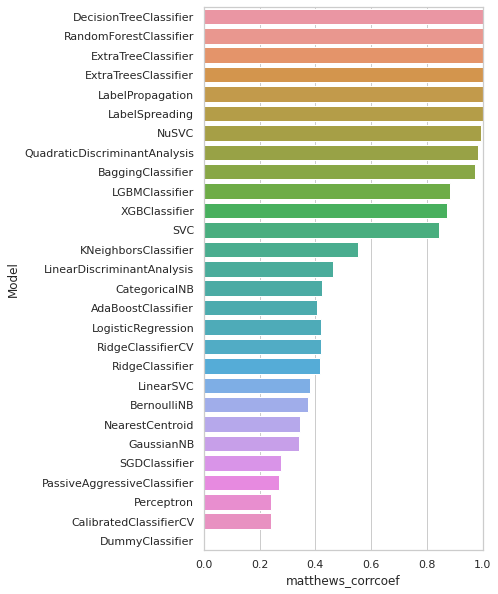

In [15]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

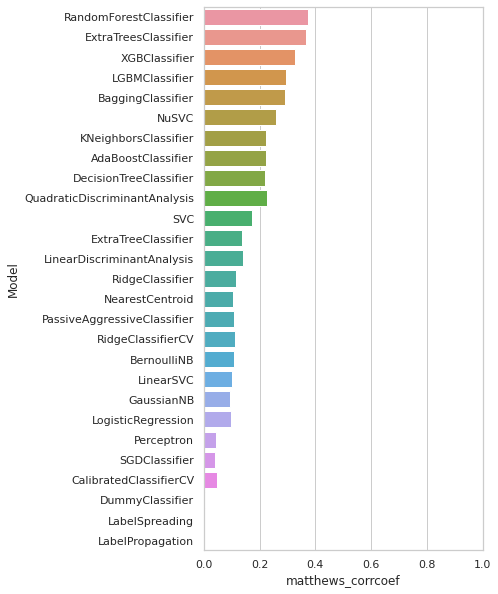

In [16]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_test.index, x="matthews_corrcoef", data=models_test)
ax.set(xlim=(0, 1))

# Random Forest

In [17]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [18]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [19]:
df_tpc['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1882    negative
1883    negative
1884    negative
1885    negative
1886    negative
Name: class, Length: 3145, dtype: object

In [20]:
# Simplest and quickest way to obtain the model performance (Accuracy)
rf.score(X_test,y_test)

0.6979332273449921

In [21]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.6979332273449921

In [22]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.3493391083711638

In [23]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[330,  47],
       [143, 109]])

In [24]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

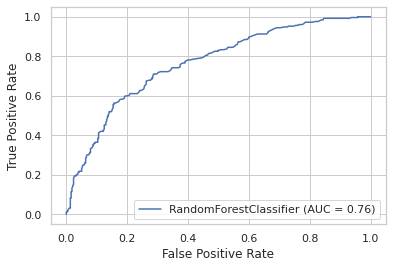

In [25]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test, y_test)  
plt.show()

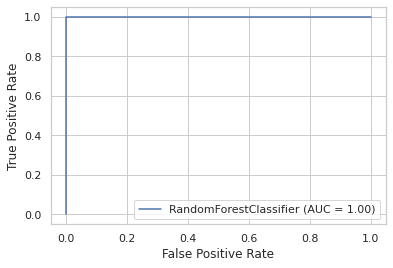

In [26]:
plot_roc_curve(rf, X_train, y_train)  
plt.show()

# Feature importance

In [27]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

DPC1_AA  DPC1_AC  DPC1_AD  DPC1_AE  DPC1_AF  DPC1_AG  DPC1_AH  DPC1_AI  \
0        5.26     0.00     0.00     0.00     0.00     5.26     0.00     0.00   
1       10.53     0.00     0.00    10.53     0.00     0.00     0.00     0.00   
2        9.09     0.00     0.00     0.00     9.09     0.00     0.00     0.00   
3        5.26     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
4        0.00     7.69     0.00     0.00     0.00     0.00     0.00     0.00   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1882     0.00     0.00     0.00     0.00     4.17     0.00     0.00     0.00   
1883     0.00     0.00     0.00     0.00     5.26     0.00     0.00     0.00   
1884     0.00     0.00     0.00     0.00     0.00     0.00     0.00     5.26   
1885     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
1886     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   

      DPC1_AK  DPC1_AL  ...  DPC1_YM  DPC1_YN  DPC1_YP  DPC1_YQ  DPC1_YR  \
0        0.00     0.00  ...     0.00     0.00     0.00     0.00     0.00   
1        0.00     0.00  ...     0.00     0.00     0.00     0.00     0.00   
2        0.00     0.00  ...     0.00     0.00     0.00     0.00     0.00   
3        0.00     0.00  ...     0.00     0.00     0.00     5.26     0.00   
4        0.00     0.00  ...     0.00     0.00     0.00     0.00     0.00   
...       ...      ...  ...      ...      ...      ...      ...      ...   
1882     0.00     0.00  ...     0.00     0.00     0.00     0.00     0.00   
1883     0.00     0.00  ...     0.00     0.00     0.00     0.00     0.00   
1884     0.00     0.00  ...     0.00     0.00     0.00     0.00     0.00   
1885     5.26     0.00  ...     0.00     0.00     0.00     0.00     0.00   
1886     0.00     0.00  ...     0.00     0.00     0.00     0.00     0.00   

      DPC1_YS  DPC1_YT  DPC1_YV  DPC1_YW  DPC1_YY  
0        0.00     0.00     0.00     0.00     0.00  
1        0.00     0.00     0.00     0.00     0.00  
2        0.00     0.00     0.00     0.00     0.00  
3        0.00     0.00     0.00     0.00     0.00  
4        0.00     0.00     0.00     0.00     0.00  
...       ...      ...      ...      ...      ...  
1882     0.00     0.00     0.00     0.00     0.00  
1883     0.00     0.00     0.00     0.00     0.00  
1884     0.00     0.00     0.00     0.00     0.00  
1885     0.00     0.00     0.00     0.00     0.00  
1886     0.00     0.00     5.26     0.00     0.00  

[3145 rows x 396 columns]

In [28]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [29]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

Feature  Gini
0    DPC1_AA  0.01
1    DPC1_AC  0.00
2    DPC1_AD  0.00
3    DPC1_AE  0.00
4    DPC1_AF  0.00
..       ...   ...
395  DPC1_YY  0.00
396      NaN  0.00
397      NaN  0.00
398      NaN  0.00
399      NaN  0.00

[400 rows x 2 columns]

Text(0.5, 0, 'Feature Importance')

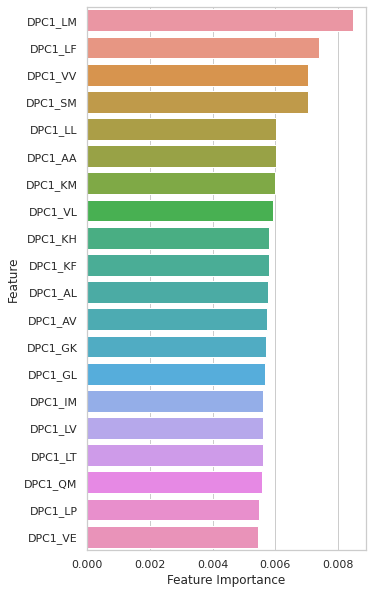

In [30]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")